# STOR 566, Homework 2
### Instructor: Yao Li
### Keywords: SVM, MLP, CNN
### Due date: Sep 18, 11:55pm
### **Submission Instruction**

- Please download this script and use it to answer the questions in the homework. 
- For submission, please include your code, code output and answers in the script and submit the ipynb file on sakai.
- Please don't modify existing cells. But you can add cells between the exercise statements.
- To make markdown, please switch the cell type to markdown (from code) - you can hit 'm' when you are in command mode - and use the markdown language. For a brief tutorial see: https://daringfireball.net/projects/markdown/syntax

### **References:**

- You can follow the setup instructions at [here](https://pytorch.org/get-started/locally/).
- A useful tutorial on learning pytorch by examples at [here](https://pytorch.org/tutorials/beginner/pytorch_with_examples.html).
- More illustrations of different optimizers could be found [here](https://ruder.io/optimizing-gradient-descent/).
- Check Pytorch optimization methods at [here](https://pytorch.org/docs/stable/optim.html)
- Check Pytorch data augmentation options at [here](https://pytorch.org/vision/main/transforms.html).


### **Evaluation Metrics of Classifiers:**

- Average loss of an epoch: 
    \begin{align}
	  \frac{1}{B}\sum_{b=1}^B\sum_{d=1}^{D_b}\frac{loss(y_{bd}, f(x_{bd}))}{D_b}
	  \end{align}
    for each training epoch
    
    - $B$: the total number of batches
    - $D_b$: the number of observations in $b$-th batch
    - $f$: the model (Logistic regression or Linear SVM or MLP or CNN)
    - loss: logistic loss or the loss of linear SVM or cross-entropy
    - $(x_{bd}, y_{bd})$: the $d$-th pair of input data and label in $b$-th batch
    - An epoch is defined as one iteration over all observations in the training dataset

- Testing accuracy: 
	\begin{align}
	\frac{1}{N}\sum_{i=1}^N {\bf 1}(\hat{y}_i=y_i)
	\end{align}	
    - $N$: the total number of samples in the testing set
    - $y_i$: true label of sample $i$
    - $\hat{y}_i$: predicted label by the model

## Problem 1 (40 points)

In this problem you will practice implementing Linear SVM and Logistic Regression to classify **handwritten digit 0 and 1**.

**Data.** You will use MNIST digit classification dataset. Pytorch/torchvision has provide a useful dataloader to automatically download and load the data into batches. In this homework, you need two class, digit 0 and digit 1, for binary classification. Code of the data loader has been provided in the template. Please don't modify the data loading part.

In [ ]:
## The following code can change the working directory to your google drive
## So you don't need to download the data every time
"""
import os
from google.colab import drive 
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/YOUR_NEW_WD')
"""

"\nimport os\nfrom google.colab import drive \ndrive.mount('/content/drive')\nos.chdir('/content/drive/MyDrive/YOUR_NEW_WD')\n"

In [ ]:
## Data loading code chunk, please don't modify it. 
## However, you can adjust the batch size if you want to.
batch_size = 64
data_dir = './data'

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import torch.utils.data as td
import random, time
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data.sampler import SubsetRandomSampler

## USE THIS SNIPPET TO GET BINARY TRAIN/TEST DATA

train_data = datasets.MNIST(data_dir, train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ]))
# Once you have downloaded the data by setting download=True, you can
# change download=True to download=False
test_data = datasets.MNIST(data_dir, train=False, download=False,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ]))

subset_indices = ((train_data.targets == 0) + (train_data.targets == 1)).nonzero()
train_loader = torch.utils.data.DataLoader(train_data,batch_size=batch_size, 
  shuffle=False,sampler=SubsetRandomSampler(subset_indices.view(-1)))


subset_indices = ((test_data.targets == 0) + (test_data.targets == 1)).nonzero()
test_loader = torch.utils.data.DataLoader(test_data,batch_size=batch_size, 
  shuffle=False,sampler=SubsetRandomSampler(subset_indices.view(-1)))

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



### **Problem Description.**
### 1. (20 points) Implement **Logistic Regression** with Pytorch to do handwritten digit 0 vs. 1 classification. Pick an optimizer yourself. 

In [ ]:

# Logistic regression
lr_model = torch.nn.Sequential(
    torch.nn.Linear(in_features=784, out_features=40),
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=40, out_features=10)
)

loss_fn = torch.nn.MSELoss(reduction='sum')
learning_rate = 4e-3
optimizer = torch.optim.Adam(lr_model.parameters(), lr=learning_rate)
losses = []

epochs = 10

for epoch in range(epochs):
    total_loss = 0
    count = 0.0
    for i, (images, labels) in enumerate(train_loader):
        # Convert the 28*28 image matrix into a 784-dim vector
        images = images.view(-1, 28 * 28)
        one_hot = torch.nn.functional.one_hot(labels, num_classes=10).float()
        # Convert labels from 0,1 to -1,1
        #grads and cost
        y_pred = lr_model(images)  
        loss = loss_fn(y_pred, one_hot)  
        
        optimizer.zero_grad()  
        loss.backward()  
        optimizer.step()  
        total_loss += float(loss)
        count += 1
    losses.append(total_loss / count)
    print('epoch = ', epoch + 1, total_loss / count)


epoch =  1 3.9278390135126884
epoch =  2 0.5420773543342196
epoch =  3 0.4126837145574767
epoch =  4 0.3646832608025182
epoch =  5 0.3238745085669286
epoch =  6 0.28751126025812795
epoch =  7 0.2807571576964675
epoch =  8 0.25751663951410186
epoch =  9 0.2685151846157481
epoch =  10 0.24039121926056617


### (a) (5 points) Report the hyper-parameters (number of epochs, learning rate, momentum etc).

### (b) (10 points) Report the **Average loss of an epoch** for every epoch by generating Average Loss vs. Epoch plot. Please report at least **10** epochs.

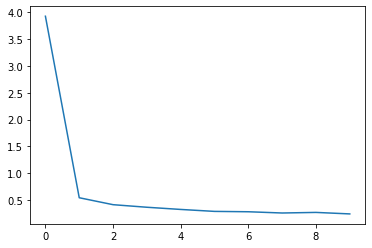

In [ ]:
## Plot:
x = []
for i in range(epochs):
    x.append(i)
plt.figure()
plt.plot(x,losses)
plt.show()


### (c) (5 points) Report the final testing accuracy of trained model.

In [ ]:
## Code:
total_acc = 0
count = 0.0
#testing
def acc(y_pred, y_true):
    T = 0
    for i in range(y_pred.shape[0]):
        if y_pred[i] == y_true[i]:
            T += 1
    return T / float(y_pred.shape[0])

for i, (images, labels) in enumerate(test_loader):
    # Convert the 28*28 image matrix into a 784-dim vector
    images = images.view(-1, 28 * 28)
    #grads and cost
    y_pred = lr_model(images)
    y_pred = np.argmax(y_pred.detach().numpy(),axis =1)
    accuracy = acc(y_pred, labels)  
    total_acc += accuracy
    count += 1
print("testing accuracy: ", total_acc/count)

testing accuracy:  0.9995404411764706


### 2. (20 points) Implement **Linear SVM** with Pytorch to do handwritten digit 0 vs. 1 classification. Pick an optimizer yourself. 

In [ ]:
from sklearn import svm
import numpy as np


predictor = svm.SVC(gamma='scale', C=0.1,max_iter = 50, decision_function_shape='ovr', kernel='rbf')
losses = []
x = []
for j in range(0,50):
    x.append(j)
for i, (images, labels) in enumerate(train_loader):
     # Convert the 28*28 image matrix into a 784-dim vector
    images = images.view(-1, 28 * 28)
    # data training
    predictor.fit(images,labels)
    loss = predictor.score(images,labels)
    losses.append(loss)

### (a) (5 points) Report the hyper-parameters (number of epochs, learning rate, momentum etc).

Answer: epochs = 50, C = 0.1

### (b) (10 points) Report the **Average loss of an epoch** for every epoch by generating Average Loss vs. Epoch plot. Please report at least **10** epochs.

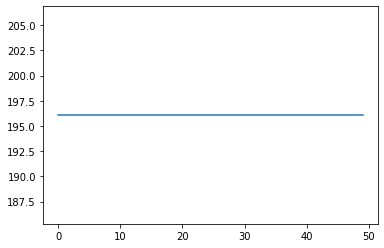

In [ ]:
## Plot:
plt.figure()
plt.plot(x, 50*[sum(losses)])
plt.show()

### (c) (5 points) Report the final testing accuracy of trained model.

In [ ]:
## Code:## Code:
total_acc = 0
count = 0.0

for i, (images, labels) in enumerate(test_loader):
    # Convert the 28*28 image matrix into a 784-dim vector
    images = images.view(-1, 28 * 28)
    # Convert labels from 0,1 to -1,1
    labels = labels.float()
    #grads and cost
    y_pred = predictor.predict(images)
    accuracy = acc(y_pred, labels)  ####loss
    total_acc += accuracy
    count += 1
print("testing accuracy: ", total_acc/count)

testing accuracy:  0.9944852941176471


## Problem 2 (60 points)

In this problem you will practice implementing MLP and CNN to classify daily life images (CIFAR10).

**Data.** You will use CIFAR10 classification dataset (10 classes). Pytorch/torchvision has provide a useful dataloader to automatically download and load the data into batches. Code of the data loader has been provided in the template. Please don't modify the data loading part.

In [ ]:
## Data loading code chunk, please don't modify it. 
## However, you can adjust the batch size if you want to.

data_dir = './data'

def cifar_loaders(batch_size, shuffle_test=False): 
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.225, 0.225, 0.225])
    train = datasets.CIFAR10(data_dir, train=True, download=True, 
        transform=transforms.Compose([
            transforms.RandomHorizontalFlip(),
            transforms.RandomCrop(32, 4),
            transforms.ToTensor(),
            normalize,
        ]))
    # Once you have downloaded the data by setting download=True, you can
    # change download=True to download=False
    test = datasets.CIFAR10(data_dir, train=False, 
        transform=transforms.Compose([transforms.ToTensor(), normalize]))
    train_loader = torch.utils.data.DataLoader(train, batch_size=batch_size,
        shuffle=True, pin_memory=True)
    test_loader = torch.utils.data.DataLoader(test, batch_size=batch_size,
        shuffle=shuffle_test, pin_memory=True)
    return train_loader, test_loader

train_loader, test_loader = cifar_loaders(batch_size)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data


### **Problem Description.**
### 1. (20 points) Implement a 7 layers fully-connected neural networks with ReLU activation to do image classification. 

In [ ]:
## Implementation of MLP
## You can insert more code chunks and text cells if you want to.
## Your code:

mlp = torch.nn.Sequential(
    nn.Linear(3072,64),
    nn.ReLU(),
    nn.Linear(64,64),
    nn.ReLU(),
    nn.Linear(64,32),
    nn.ReLU(),
    nn.Linear(32,16),
    nn.ReLU(),
    nn.Linear(16,16),
    nn.ReLU(),
    nn.Linear(16,10)
)

cost = torch.nn.MultiLabelSoftMarginLoss()
learning_rate = 1e-3
optimizer = torch.optim.Adam(mlp.parameters(),lr = learning_rate)
losses = []

#TRAINING
for epoch in range(epochs):
    total_loss = 0
    count = 0.0
    for i, (images, labels) in enumerate(train_loader):
        images = images.view(-1, 32 * 32 * 3)
        # Convert labels from 0,1 to -1,1
        one_hot = torch.nn.functional.one_hot(labels, num_classes=10)
        #grads and cost
        y_pred = mlp(images) 
        loss = cost(y_pred, one_hot)  ####loss
        
        optimizer.zero_grad()  
        loss.backward()  
        optimizer.step()  
        total_loss += float(loss)
        count += 1
    losses.append(total_loss / count)
    print('epoch = ', epoch + 1, total_loss / count)
    

epoch =  1 0.30675720972249576
epoch =  2 0.26859719247159447
epoch =  3 0.2593278570477005
epoch =  4 0.25213559213882825
epoch =  5 0.24695601384810476
epoch =  6 0.24211539667280738
epoch =  7 0.239180727097232
epoch =  8 0.23664900673853467
epoch =  9 0.2338497122306653
epoch =  10 0.23282026146988735


### (a) (5 points) Print the model architecture.

In [ ]:
## Print the model:
print(mlp)

Sequential(
  (0): Linear(in_features=3072, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=16, bias=True)
  (9): ReLU()
  (10): Linear(in_features=16, out_features=10, bias=True)
)


### (b) (10 points) Report the **Average loss of an epoch** for every epoch by generating Average Loss vs. Epoch plot. Please report at least **10** epochs.

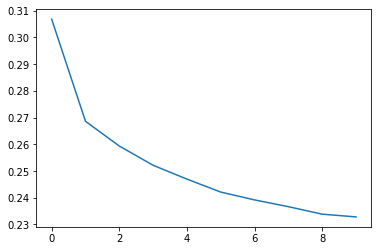

In [ ]:
## Plot:
x = []
for i in range(epochs):
    x.append(i)
plt.figure()
plt.plot(x,losses)
plt.show()

### (c) (5 points) Report the final testing accuracy of trained model.

In [ ]:
total_acc = 0
count = 0.0
#testing

for i, (images, labels) in enumerate(test_loader):
    images = images.view(-1, 32 * 32 * 3)
    #grads and cost    
    y_pred = mlp(images)
    y_pred = np.argmax(y_pred.detach().numpy(),axis =1)
    accuracy = acc(y_pred, labels)  #####loss
    total_acc += accuracy
    count += 1
print("testing accuracy: ", total_acc/count)

testing accuracy:  0.43839570063694266


### 2. (30 points) Implement a 7 layers CNN with 4 convolutional layers, 3 fully-connected layers and ReLU activation function. The input dimension of the 1st fully-connected layer must be 4096.

In [ ]:

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(3, 32, 3, stride = 1,padding=1),  # in_channels, out_channels, kernel_size
            nn.ReLU(),

            nn.Conv2d(32, 16, 3, stride = 1,padding=1),
            nn.ReLU(),

            nn.Conv2d(16, 8, 3, stride = 1,padding=1),
            nn.ReLU(),

            nn.Conv2d(8, 4, 3, stride = 1,padding=1),
            nn.ReLU(),
        )
        self.fc = nn.Sequential(
            nn.Linear(4096, 128),
            nn.ReLU(),
            nn.Linear(128, 32),
            nn.ReLU(),
            nn.Linear(32, 10)
        )

    def forward(self, img):
        feature = self.conv(img)
        output = self.fc(feature.view(img.shape[0],-1))
        return output

losses = []
cnn = CNN()
cost = torch.nn.MultiLabelSoftMarginLoss()
learning_rate = 2e-3
optimizer = torch.optim.Adam(cnn.parameters(), lr=learning_rate)
# Training
for epoch in range(epochs):
    total_loss = 0
    count = 0.0
    for i, (images, labels) in enumerate(train_loader):
        images = images.view(-1, 3, 32, 32)
        # Convert labels from 0,1 to -1,1
        one_hot = torch.nn.functional.one_hot(labels, num_classes=10)
        # grads and cost
        y_pred = cnn(images)  # x_data into model y predict
        loss = cost(y_pred, one_hot)  #####loss
        
        optimizer.zero_grad()  
        loss.backward()  
        optimizer.step()  
        total_loss += float(loss)
        count += 1
    losses.append(total_loss / count)
    print('epoch = ', epoch + 1, total_loss / count)

epoch =  1 0.2806170809909206
epoch =  2 0.2411748280420023
epoch =  3 0.2227216583421773
epoch =  4 0.21185472784825907
epoch =  5 0.20370842036231399
epoch =  6 0.1975404265553445
epoch =  7 0.1938267022256961
epoch =  8 0.19035509564077763
epoch =  9 0.18762495955619055
epoch =  10 0.1853146531697734


### (a) (5 points) Print the model architecture.

In [18]:
## Print the model:
print(cnn)

CNN(
  (conv): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): Conv2d(16, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): ReLU()
    (6): Conv2d(8, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
  )
  (fc): Sequential(
    (0): Linear(in_features=4096, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=10, bias=True)
  )
)


### (b) (10 points) Report the **Average loss of an epoch** for every epoch by generating Average Loss vs. Epoch plot. Please report at least **10** epochs.

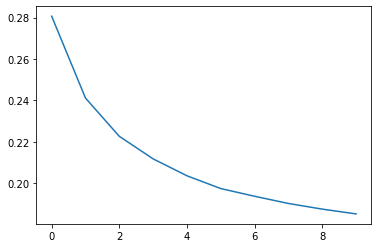

In [21]:
## Plot:
x = []
for i in range(epochs):
    x.append(i)
plt.figure()
plt.plot(x,losses)
plt.show()

### (c) (5 points) Report the final testing accuracy of trained model.

In [22]:
## Code:
total_acc = 0
count = 0.0
#testing

for i, (images, labels) in enumerate(test_loader):
    images = images.view(-1, 3, 32, 32)
    # Convert labels from 0,1 to -1,1
    one_hot = torch.nn.functional.one_hot(labels, num_classes=10)
    #grads and cost
    y_pred = cnn(images)
    y_pred = np.argmax(y_pred.detach().numpy(),axis =1)
    accuracy = acc(y_pred, labels)  ###loss
    total_acc += accuracy
    count += 1
print("testing accuracy: ", total_acc/count)

testing accuracy:  0.6105692675159236


### (d) (10 points) Write a new cifar$\_$loaders function to try different data augmentation methods.

In [23]:
## Code: 
def cifar_loaders():
    transform_train = transforms.Compose([
        transforms.RandomCrop(32, padding=4),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(), # converting images to tensor
        transforms.Normalize(mean = (0.5, 0.5, 0.5), std = (0.5, 0.5, 0.5)) 
    ])
    train = datasets.CIFAR10(data_dir, train=True, download=True, 
        transform=transforms.Compose([
            transforms.RandomHorizontalFlip(),
            transforms.RandomCrop(32, 4),
            transforms.ToTensor(),
            transform_train,
        ]))
    transform_test = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean = (0.5, 0.5, 0.5), std = (0.5, 0.5, 0.5))
    ])
    test = datasets.CIFAR10(data_dir, train=False, 
        transform=transforms.Compose([transforms.ToTensor(), transform_test]))
    train_loader = torch.utils.data.DataLoader(train, batch_size=batch_size,
        shuffle=True, pin_memory=True)
    test_loader = torch.utils.data.DataLoader(test, batch_size=batch_size,
        shuffle=shuffle_test, pin_memory=True)
    return train_loader, test_loader

Answer:

### 3. (10 points) Please compare the results of the two models (MLP and CNN).

Answer:
MLP
1. The network consists of many hidden layers
2. Each neuron is connected to all nodes in the above
3. Large amount of parameters and great difficulty
4. MLP agree to accept the spatial information between rooms and only accept the spatial information entered by each other

CNN
1. Few connections, very few
2. Accept the relationship matrix and use the interspace
3. Pooling and holes can be introduced